# Coursework: Digital Number Recognition with Neural Network

- Coursework Admin: Junru Lu
- Office: CS2.18
- Email: junru.lu@warwick.ac.uk
- Codes: https://github.com/LuJunru/CS331-Neural-Computing-Tutorials

## Main Introduction
The purpose of this coursework is to build a digital number recognition neural network. We will use three methods: pure numpy, scikit-learn, and pytorch. Don't worry, this dataset is very simple and linearly separable, we will use perceptrons to solve it. Subtasks and grades assignment are shown below:
- **Coding Style (5%)**: following pep 8 rules (https://www.python.org/dev/peps/pep-0008/)
- **Subtask1 (45%)**: build NN to realize digital number recognition with pure numpy
- **Subtask2 (10%)**: build NN to realize digital number recognition with scikit-learn library
- **Subtask3 (20%)**: build NN to realize digital number recognition with pytorch library
- **Subtask4 (20%)**: 
  - 10%: create digital alphabet data (upper letters)
  - 10%: choose any method from above to build an NN for digital alphabet, run the NN, and draw accuracy lines. If you choose pure numpy, you will receive all 10%. 4% for scikit-learn and 8% for pytorch.
- **Submission**: a runnable jupyter notebook with your name and ids

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from IPython.display import Image
prefix = 'https://raw.githubusercontent.com/LuJunru/CS331-Neural-Computing-Tutorials/master/Week6/'
pics = ["digit_reco_10_digits.png", "digit_reco_template.png", "digit_reco_26_letters.png"]
pic_links = [prefix + pic for pic in pics]
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter("ignore")

%matplotlib inline

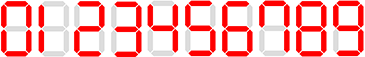

In [2]:
Image(pic_links[0])

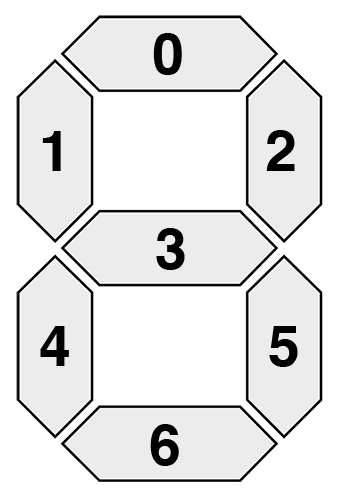

In [3]:
Image(pic_links[1], width=60)

## 1. Create Data
- Digital numbers are not like handwritten numbers. They only have several fixed patterns. According to above pictures, 7 segments, named features, are enough to describe a digital number. The feature pattern is defined below.

In [4]:
patterns = {0: [1, 1, 1, 0, 1, 1, 1],
            1: [0, 1, 0, 0, 1, 0, 0],
            2: [1, 0, 1, 1, 1, 0, 1],
            3: [1, 0, 1, 1, 0, 1, 1], 
            4: [0, 1, 1, 1, 0, 1, 0],
            5: [1, 1, 0, 1, 0, 1, 1],
            6: [1, 1, 0, 1, 1, 1, 1],
            7: [1, 1, 1, 0, 0, 1, 0],
            8: [1, 1, 1, 1, 1, 1, 1],
            9: [1, 1, 1, 1, 0, 1, 1]}

In [5]:
# fixed data with given random seed
# Otherwise try: np.random.randint(0, 10, size=(500))
# Do not change this seed when doing the course work

rng = np.random.RandomState(42)
dis = rng.randint(0, 10, size=(256))
dis[:10]

array([6, 3, 7, 4, 6, 9, 2, 6, 7, 4])

<BarContainer object of 10 artists>

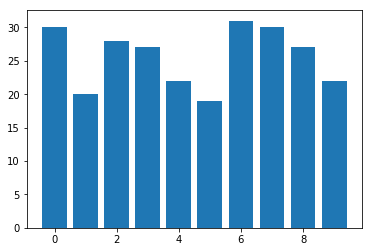

In [6]:
# 1024 samples are randomly generated
# Distribution of every number shows this data is balanced

sample_counts = [len(dis[dis == i]) for i in range(10)]
plt.bar(range(10), sample_counts)

In [7]:
data = np.array([patterns[v] for v in dis])
data[:5]

array([[1, 1, 0, 1, 1, 1, 1],
       [1, 0, 1, 1, 0, 1, 1],
       [1, 1, 1, 0, 0, 1, 0],
       [0, 1, 1, 1, 0, 1, 0],
       [1, 1, 0, 1, 1, 1, 1]])

[6 3 7 4 6 9 2 6 7 4 3 7 7 2 5 4 1 7 5 1 4 0 9 5 8 0 9 2 6 3 8 2 4 2 6 4 8
 6 1 3 8 1 9 8 9]


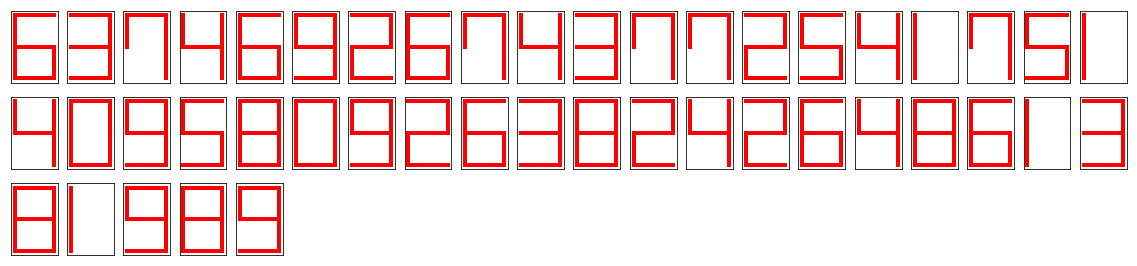

In [8]:
# Functions to draw pictures of given samples.

def DrawDigitalNumber(ax, sample):
    """
    draw one digital numebr on given axes
    """
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlim([-0.1, 1.1])
    ax.set_ylim([-0.1, 1.6])
    for i, feature in enumerate(sample):
        if i == 0 and feature:
            ax.plot((0, 1), (1.5, 1.5), c='r', linewidth=4)
        if i == 1 and feature:
            ax.plot((0, 0), (0.75, 1.5), c='r', linewidth=4)
        if i == 2 and feature:
            ax.plot((1, 1), (0.75, 1.5), c='r', linewidth=4)
        if i == 3 and feature:
            ax.plot((0, 1), (0.75, 0.75), c='r', linewidth=4)
        if i == 4 and feature:
            ax.plot((0, 0), (0.75, 0), c='r', linewidth=4)
        if i == 5 and feature:
            ax.plot((1, 1), (0.75, 0), c='r', linewidth=4)
        if i == 6 and feature:
            ax.plot((0, 1), (0, 0), c='r', linewidth=4)

def DrawDigitalNumbers(count_in_lines, samples):
    """
    draw digital numbers based on input features
    """
    number = len(samples)
    
    rows = (number // count_in_lines + 1)
    fig = plt.figure(figsize=(1 * count_in_lines, 1.5 * rows))
    for i in range(number):
        ax = fig.add_subplot(rows, count_in_lines, i + 1)
        DrawDigitalNumber(ax, samples[i])
       
    
print(dis[:45])
DrawDigitalNumbers(20, data[:45])

In [9]:
# Create training set and valid set
# Do not change parameter values when doing the course work

X = data
Y = dis
Train_x, Valid_x, Train_y, Valid_y = train_test_split(X, Y, train_size=0.8, random_state=42)
Train_x.shape, Valid_y.shape

((204, 7), (52,))

# 2. Create Model

# ---------------------------------Subtasks start here------------------------------------

## Most important: One vs. Rest tricks
- We are going to finish these tasks only by perceptrons. However, perceptron can only deal with binary classification problem, so we need **One vs. Rest tricks** to deal with multi-class classification problems. Check the wikipedia before start: https://en.wikipedia.org/wiki/Multiclass_classification#One-vs.-rest

## 2.1. Subtask1: Pure Numpy (45%)

In [10]:
# 10%: fill in codes to update weights and bias. If correct, the next cell will generate same results

def perceptronStep(X, y, W, b, learn_rate=0.01):
    """
    Fill in codes
    """
    return W, b

In [11]:
# Do not change this seed when doing the course work
np.random.seed(42)

def trainPerceptronAlgorithm(X, y, learn_rate=0.01, num_epochs=25):
    W = np.array(np.random.rand(X.shape[1], 1))
    b = np.random.rand(1)[0] + max(X.T[0])
    for i in range(num_epochs):
        # In each epoch, we apply the perceptron step.
        W, b = perceptronStep(X, y, W, b, learn_rate)
    return W, b

trainPerceptronAlgorithm(Train_x, Train_y)

(array([[ 0.01454012],
        [ 0.01071431],
        [-0.01800606],
        [ 0.01865848],
        [ 0.01601864],
        [-0.02400548],
        [-0.04191639]]), 0.026176145774933546)

In [12]:
# 20%: fill in codes to build the model with one vs. rest tricks

# Do not change this seed when doing the course work
np.random.seed(42)

scores = np.zeros((len(Valid_y), 10))
for i in range(10):
    """
    Fill in codes
    """
Predict_Y, Valid_y

(array([9, 2, 8, 3, 6, 1, 3, 3, 4, 8, 6, 8, 3, 6, 8, 6, 5, 4, 8, 8, 4, 1,
        9, 5, 2, 0, 7, 9, 3, 0, 2, 6, 3, 3, 1, 0, 2, 5, 9, 4, 4, 0, 2, 4,
        4, 3, 1, 7, 0, 0, 1, 1]),
 array([9, 2, 8, 3, 6, 1, 3, 3, 4, 8, 6, 8, 3, 6, 8, 6, 5, 4, 8, 8, 4, 1,
        9, 5, 2, 0, 7, 9, 3, 0, 2, 6, 3, 3, 1, 0, 2, 5, 9, 4, 4, 0, 2, 4,
        4, 3, 1, 7, 0, 0, 1, 1]))

[9 2 8 3 6 1 3 3 4 8]


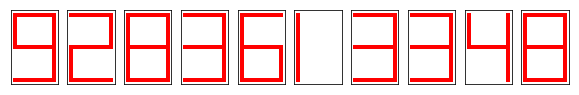

In [13]:
print(Predict_Y[:10])
DrawDigitalNumbers(10, Valid_x[:10])

Text(0.5, 1.0, 'Accuracy lines for training set and valid set')

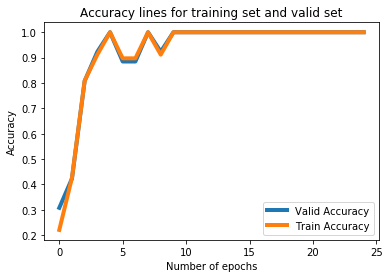

In [14]:
# 15%: Draw accuracy lines for training set and valid set as epoch increasing from 1 to 25

# Do not change this seed when doing the course work
np.random.seed(42)

"""
Develop the codes
"""

## 2.2. Subtask2: Sklearn (10%)

In [15]:
from sklearn.linear_model import Perceptron

clf = Perceptron(max_iter=25, eta0=0.1, random_state=42)
clf

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.1,
           fit_intercept=True, max_iter=25, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=42, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [16]:
# 10%: check the usage of sklearn library and fill the codes to build the model. It should be only 2 or 3 lines.

"""
Develop the codes
"""

(array([9, 2, 8, 3, 6, 1, 3, 3, 4, 8, 6, 8, 3, 6, 8, 6, 5, 4, 8, 8, 4, 1,
        9, 5, 2, 0, 7, 9, 3, 0, 2, 6, 3, 3, 1, 0, 2, 5, 9, 4, 4, 0, 2, 4,
        4, 3, 1, 7, 0, 0, 1, 1]),
 array([9, 2, 8, 3, 6, 1, 3, 3, 4, 8, 6, 8, 3, 6, 8, 6, 5, 4, 8, 8, 4, 1,
        9, 5, 2, 0, 7, 9, 3, 0, 2, 6, 3, 3, 1, 0, 2, 5, 9, 4, 4, 0, 2, 4,
        4, 3, 1, 7, 0, 0, 1, 1]))

## 2.3. Subtask3: Pytorch (20%)
- Probably you may have noticed it is too complicated to build a neural network with pure numpy, while too simple with sklearn that you can barely know nothing about the running process. Thus, we'll do this with Pytorch, one of the most popular neural network framework in Python. Pytorch allows users to build own neural network architecture intuitively. This is beacuse Pytorch updates weights and bias automatically once you set up the forwarding process of you network. In other word, Pytorch can realize back propagation by itself.

In [17]:
import torch
print("My Pytorch version: " + torch.__version__)
from torch.autograd import Variable
import torch.nn as nn
import torch.optim as optim

def setup_seed(seed):
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    np.random.seed(seed)
    torch.backends.cudnn.deterministic = True

My Pytorch version: 1.4.0


In [18]:
# 5%: set up the network architecture. If correct, the next cell will generate same results

# In general, we can import activation functions like Sigmoid or Relu directly from Pytroch Library
# However, Pytorch does not contain Heaviside Step Function
class StepF(torch.autograd.Function):
    def forward(self, input):
        input[input > 0] = 1
        input[input <= 0] = 0
        return input
    
    def backward(self, input):
        return input
    
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(7, 1)
        self.act = StepF()
    def forward(self, x):
        """
        Fill in codes
        """
        return x

In [19]:
# This is the sample codes to run a perceptron on a binary problem with Pytorch

setup_seed(42)
net = Net()
loss_fun = nn.BCELoss()
optimizer = optim.SGD(net.parameters(), lr=0.01)

Sample_x, Sample_y = [], []
for i in range(len(Train_y)):
    if Train_y[i] in [0, 1]:
        Sample_x.append(Train_x[i])
        Sample_y.append(Train_y[i])
Sample_x = np.array(Sample_x)
Sample_y = np.array(Sample_y)
X = Variable(torch.FloatTensor(Sample_x), requires_grad=True)
Y = Variable(torch.FloatTensor(Sample_y), requires_grad=False)
for epoch in range(1, 11):
    outputs = net(X)
    loss = loss_fun(outputs, Y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print("Epoch {} - loss: {}".format(epoch, loss.data))

Epoch 1 - loss: 17.451173782348633
Epoch 2 - loss: 10.179849624633789
Epoch 3 - loss: 10.179849624633789
Epoch 4 - loss: 0.0
Epoch 5 - loss: 0.0
Epoch 6 - loss: 0.0
Epoch 7 - loss: 0.0
Epoch 8 - loss: 0.0
Epoch 9 - loss: 0.0
Epoch 10 - loss: 0.0


In [20]:
# 15%: based on sample codes above, fill the codes to build the digital number classfication model

scores = np.zeros((len(Valid_y), 10))
X = Variable(torch.FloatTensor(Train_x), requires_grad=True)
for i in range(10):
    """
    Fill the codes
    """
    paras = list(net.parameters())
    score = np.dot(Valid_x, paras[0].detach().numpy().T) + paras[1].detach().numpy()
    """
    Fill the codes
    """
Predict_Y, Valid_y

Class 0 - loss: 0.0
Class 1 - loss: 0.0
Class 2 - loss: 0.0
Class 3 - loss: 0.0
Class 4 - loss: 0.0
Class 5 - loss: 0.0
Class 6 - loss: 0.0
Class 7 - loss: 0.0
Class 8 - loss: 0.0
Class 9 - loss: 0.0


(array([9, 2, 8, 3, 6, 1, 3, 3, 4, 8, 6, 8, 3, 6, 8, 6, 5, 4, 8, 8, 4, 1,
        9, 5, 2, 0, 7, 9, 3, 0, 2, 6, 3, 3, 1, 0, 2, 5, 9, 4, 4, 0, 2, 4,
        4, 3, 1, 7, 0, 0, 1, 1]),
 array([9, 2, 8, 3, 6, 1, 3, 3, 4, 8, 6, 8, 3, 6, 8, 6, 5, 4, 8, 8, 4, 1,
        9, 5, 2, 0, 7, 9, 3, 0, 2, 6, 3, 3, 1, 0, 2, 5, 9, 4, 4, 0, 2, 4,
        4, 3, 1, 7, 0, 0, 1, 1]))

## 2.4. Subtask4: Digital Alphabet Data (20%)

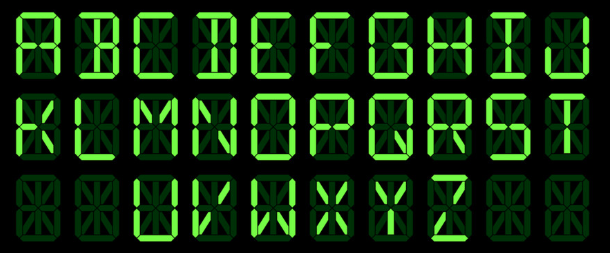

In [21]:
Image(pic_links[2])

In [ ]:
"""
Develop the codes: create digital alphabet data (upper letters), then build an NN.
Hint: it is possible that linear perceptron can not deal with this data. If so, try to use multi-layer structures
      and non-linear activation functions. Specifically, warming-up exercises tells how to do this with pure numpy.
"""